In [1]:
from preprocessing import prepare_dataset, prepare_dataset_single
from models import DANN_Model

import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import datetime

In [2]:
(source_train_dataset, source_test_dataset) = prepare_dataset_single('SYN')
(_, target_test_dataset_1) = prepare_dataset_single('MNIST')
(_, target_test_dataset_2) = prepare_dataset_single('SVHN')

In [3]:
lp_lr = 0.001
dc_lr = 0.0015
fe_lr = 0.0015
# fe_lr = 0.0000
# fe_lr = 0.00
# fe_lr = 0.000005

lr = (lp_lr, dc_lr, fe_lr)
model = DANN_Model(input_shape=(32, 32, 3), model_type='SVHN', run_name='so_syn', lr=lr, source_only=True, category = ('MNIST', 'SVHN'))

Log folder created as ../log/so_syn_2


2019-06-29 22:55:03.842587
Epoch: 1
L1 Test: 0.0968, Acc1 Test: 97.54
L2 Test: 0.9150, Acc2 Test: 85.78
L3 Test: 1.0170, Acc3 Test: 78.57



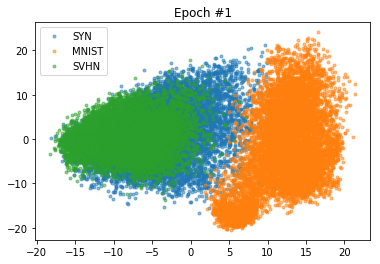

2019-06-29 22:56:08.924326
Epoch: 2
L1 Test: 0.0782, Acc1 Test: 98.13
L2 Test: 0.8576, Acc2 Test: 84.89
L3 Test: 0.8777, Acc3 Test: 80.42



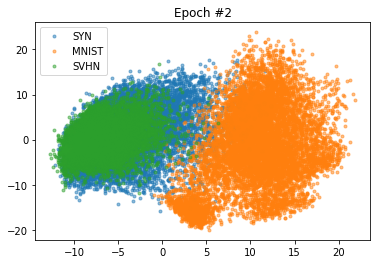

2019-06-29 22:57:13.140960
Epoch: 3
L1 Test: 0.0706, Acc1 Test: 98.18
L2 Test: 0.6614, Acc2 Test: 88.64
L3 Test: 0.8660, Acc3 Test: 80.91



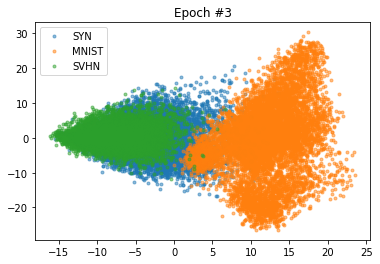

2019-06-29 22:58:17.291543
Epoch: 4
L1 Test: 0.1465, Acc1 Test: 96.48
L2 Test: 1.0745, Acc2 Test: 84.83
L3 Test: 1.2192, Acc3 Test: 73.06



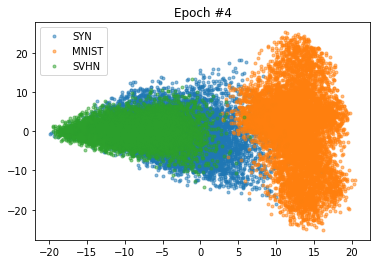

2019-06-29 22:59:21.329433
Epoch: 5
L1 Test: 0.0739, Acc1 Test: 98.31
L2 Test: 0.7306, Acc2 Test: 87.99
L3 Test: 0.7899, Acc3 Test: 82.78



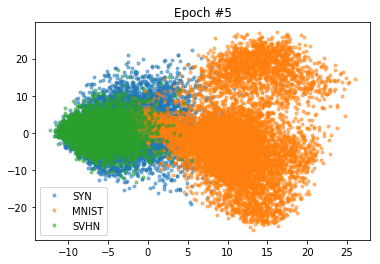

2019-06-29 23:00:26.069203
Epoch: 6
L1 Test: 0.0875, Acc1 Test: 97.84
L2 Test: 0.8128, Acc2 Test: 87.20
L3 Test: 1.1416, Acc3 Test: 75.39



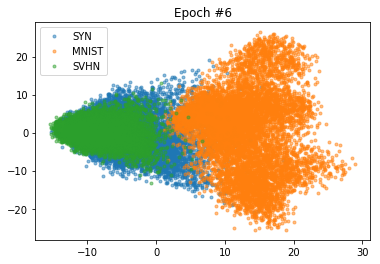

2019-06-29 23:01:33.016341
Epoch: 7
L1 Test: 0.0886, Acc1 Test: 97.87
L2 Test: 0.9092, Acc2 Test: 87.76
L3 Test: 1.0606, Acc3 Test: 78.47



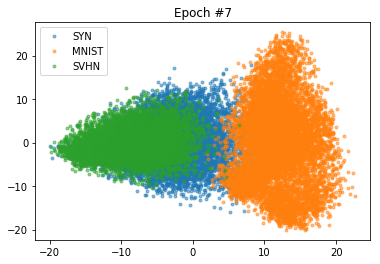

2019-06-29 23:02:40.486042
Epoch: 8
L1 Test: 0.0965, Acc1 Test: 97.72
L2 Test: 0.7581, Acc2 Test: 88.60
L3 Test: 1.0111, Acc3 Test: 78.97



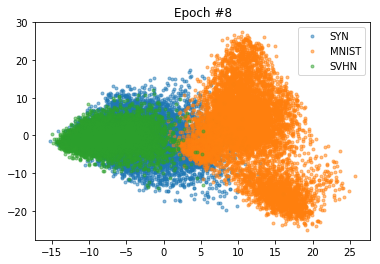

2019-06-29 23:03:48.068686


KeyboardInterrupt: 

In [6]:
EPOCHS = 50

for epoch in range(EPOCHS):
    
    print(datetime.datetime.now())
        
    for (source_images, class_labels) in source_train_dataset:
        model.train_source_only(source_images, class_labels)

    latent_source = []
    for (test_images, test_labels) in source_test_dataset:
        model.test_source_only(test_images, test_labels, 0)
        if len(latent_source) == 0:
            latent_source = model.return_latent_variables(test_images)
        else:
            latent_source = np.concatenate([latent_source, model.return_latent_variables(test_images)])
      
    latent_target_1 = []
    for (target_images_1, target_labels_1) in target_test_dataset_1:
        model.test_source_only(target_images_1, target_labels_1, 1)
        if len(latent_target_1) == 0:
            latent_target_1 = model.return_latent_variables(target_images_1)
        else:
            latent_target_1 = np.concatenate([latent_target_1, model.return_latent_variables(target_images_1)])
        
    latent_target_2 = []
    for (target_images_2, target_labels_2) in target_test_dataset_2:
        model.test_source_only(target_images_2, target_labels_2, 2)
        if len(latent_target_2) == 0:
            latent_target_2 = model.return_latent_variables(target_images_2)
        else:
            latent_target_2 = np.concatenate([latent_target_2, model.return_latent_variables(target_images_2)])
    
    print('Epoch: {}'.format(epoch + 1))
    print(model.log_source_only())
    
    index = [0, len(latent_source), len(latent_source) + len(latent_target_1), len(latent_source) + len(latent_target_1) + len(latent_target_2)]  
    latent_variables = np.concatenate([latent_source, latent_target_1, latent_target_2])

    pca_embedding = PCA(n_components=2).fit_transform(latent_variables)

    plt.figure()
    plt.title('Epoch #{}'.format(epoch + 1))
    for i in range(len(index) - 1):
        plt.plot(pca_embedding[index[i]:index[i+1], 0], pca_embedding[index[i]:index[i+1], 1], '.', alpha=0.5)
    plt.legend(['SYN', 'MNIST', 'SVHN'])
    plt.show()